In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('fast')

In [14]:
sentiment_df = pd.read_csv('../../../src/nlp/sentiment_scores.csv')
sentiment_df.head()

,author,model,neg_percentage,neu_percentage,pos_percentage,predicted_sentiment,id
0,Coteup,roberta,0.797909,0.191437,0.010654,negative,t3_1lzuccl
1,_alpinisto,roberta,0.623699,0.368144,0.008157,negative,t3_1lzy15f
2,PsychLegalMind,roberta,0.378499,0.583326,0.038175,neutral,t3_1lzrb15
3,jaytee319,roberta,0.716197,0.269992,0.013811,negative,t3_1lyiioj
4,the_original_Retro,roberta,0.417584,0.550597,0.031818,neutral,t3_1lys6tq


In [15]:
sentiment_df.loc[sentiment_df['id'] == 't3_1lzuccl']

,author,model,neg_percentage,neu_percentage,pos_percentage,predicted_sentiment,id
0,Coteup,roberta,0.797909,0.191437,0.010654,negative,t3_1lzuccl
279018,Coteup,bertweet,0.815800,0.179159,0.005042,negative,t3_1lzuccl


In [16]:
roberta_df = sentiment_df.loc[sentiment_df['model'] == 'roberta'].copy()
# Defining max sentiment percentage
roberta_df['sentiment_percentage'] = roberta_df[['neg_percentage', 'neu_percentage', 'pos_percentage']].max(axis=1)

bertweet_df = sentiment_df.loc[sentiment_df['model'] == 'bertweet'].copy()
bertweet_df['sentiment_percentage'] = bertweet_df[['neg_percentage', 'neu_percentage', 'pos_percentage']].max(axis=1)

df_merged = roberta_df.merge(bertweet_df, on=['id', 'author'], suffixes=('_roberta', '_bertweet'))

# Rename colums
df_merged = df_merged.rename(columns={
    'neg_percentage_roberta': 'roberta_neg',
    'neu_percentage_roberta': 'roberta_neu',
    'pos_percentage_roberta': 'roberta_pos',
    'neg_percentage_bertweet': 'bertweet_neg',
    'neu_percentage_bertweet': 'bertweet_neu',
    'pos_percentage_bertweet': 'bertweet_pos'
})

In [17]:
df_merged.iloc[0]

author                               Coteup
model_roberta                       roberta
roberta_neg                        0.797909
roberta_neu                        0.191437
roberta_pos                        0.010654
predicted_sentiment_roberta        negative
id                               t3_1lzuccl
sentiment_percentage_roberta       0.797909
model_bertweet                     bertweet
bertweet_neg                         0.8158
bertweet_neu                       0.179159
bertweet_pos                       0.005042
predicted_sentiment_bertweet       negative
sentiment_percentage_bertweet        0.8158
Name: 0, dtype: object

In [57]:
# Calculating differences between sentiments percentages for boxplot
df_merged['diff_neg'] = df_merged['roberta_neg'] - df_merged['bertweet_neg']
df_merged['diff_neu'] = df_merged['roberta_neu'] - df_merged['bertweet_neu']
df_merged['diff_pos'] = df_merged['roberta_pos'] - df_merged['bertweet_pos']
df_merged['diff_pred_sentiment'] = df_merged['sentiment_percentage_roberta'] - df_merged['sentiment_percentage_bertweet']

df_merged.dropna()

,author,model_roberta,roberta_neg,roberta_neu,roberta_pos,predicted_sentiment_roberta,id,sentiment_percentage_roberta,model_bertweet,bertweet_neg,bertweet_neu,bertweet_pos,predicted_sentiment_bertweet,sentiment_percentage_bertweet,diff_neg,diff_neu,diff_pos,diff_pred_sentiment
0,Coteup,roberta,0.797909,0.191437,0.010654,negative,t3_1lzuccl,0.797909,bertweet,0.815800,0.179159,0.005042,negative,0.815800,-0.017891,0.012279,0.005612,-0.017891
1,_alpinisto,roberta,0.623699,0.368144,0.008157,negative,t3_1lzy15f,0.623699,bertweet,0.960234,0.037553,0.002213,negative,0.960234,-0.336535,0.330591,0.005944,-0.336535
2,PsychLegalMind,roberta,0.378499,0.583326,0.038175,neutral,t3_1lzrb15,0.583326,bertweet,0.500282,0.491378,0.008340,negative,0.500282,-0.121783,0.091948,0.029835,0.083044
3,jaytee319,roberta,0.716197,0.269992,0.013811,negative,t3_1lyiioj,0.716197,bertweet,0.876050,0.120546,0.003405,negative,0.876050,-0.159853,0.149447,0.010406,-0.159853
4,the_original_Retro,roberta,0.417584,0.550597,0.031818,neutral,t3_1lys6tq,0.550597,bertweet,0.447602,0.545105,0.007293,neutral,0.545105,-0.030018,0.005493,0.024525,0.005493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279013,manjaro_black,roberta,0.051964,0.857664,0.090372,neutral,t1_h4dvj0v,0.857664,bertweet,0.051474,0.932685,0.015841,neutral,0.932685,0.000490,-0.075022,0.074532,-0.075022
279014,[deleted],roberta,0.404887,0.541455,0.053657,neutral,t1_h4g7dg9,0.541455,bertweet,0.443592,0.542163,0.014245,neutral,0.542163,-0.038705,-0.000708,0.039412,-0.000708
279015,spdrmn,roberta,0.060489,0.754241,0.185271,neutral,t1_h4dc13x,0.754241,bertweet,0.009232,0.952704,0.038064,neutral,0.952704,0.051257,-0.198463,0.147207,-0.198463
279016,[deleted],roberta,0.136041,0.588397,0.275562,neutral,t1_h5xwneh,0.588397,bertweet,0.079796,0.837189,0.083015,neutral,0.837189,0.056245,-0.248792,0.192547,-0.248792


#### Errorbar for Predicted Sentiment - RoBERTa and BERTweet comparison

Text(95.72222222222221, 0.5, 'RoBERTa predictions')

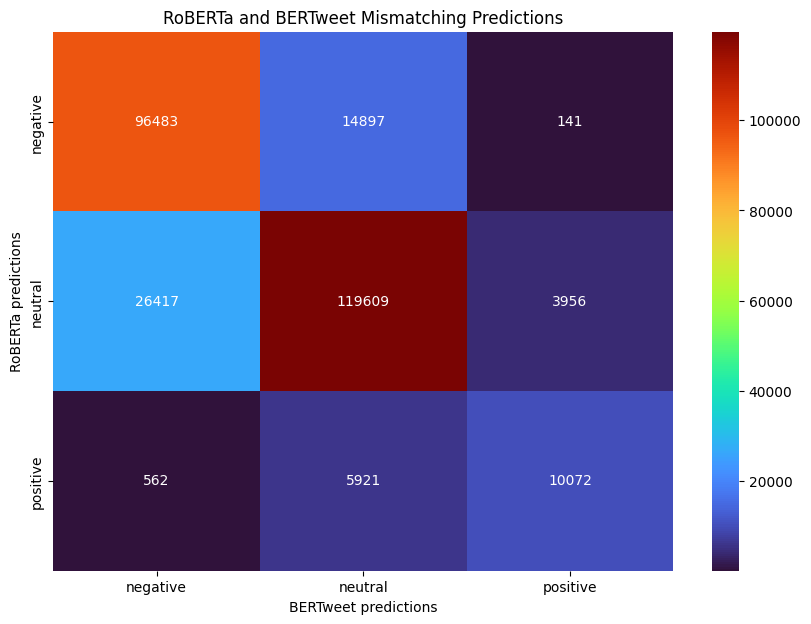

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(pd.crosstab(df_merged['predicted_sentiment_roberta'], df_merged['predicted_sentiment_bertweet']), annot=True, fmt='d', cmap='turbo')
plt.title('RoBERTa and BERTweet Mismatching Predictions')
plt.xlabel('BERTweet predictions')
plt.ylabel('RoBERTa predictions')

In [85]:
mean_roberta = df_merged[['roberta_neg', 'roberta_neu', 'roberta_pos']].mean()
mean_bertweet = df_merged[['bertweet_neg', 'bertweet_neu', 'bertweet_pos']].mean()

print("Mean Preditctions of RoBERTa:\n", mean_roberta)
print("Mean Preditctions of  BERTweet:\n", mean_bertweet)

if(mean_roberta['roberta_pos'] > mean_bertweet['bertweet_pos']):
    print("RoBERTa is more OPTIMISTIC then BERTweet")

Mean Preditctions of RoBERTa:
 roberta_neg    0.409678
roberta_neu    0.476844
roberta_pos    0.113479
dtype: float64
Mean Preditctions of  BERTweet:
 bertweet_neg    0.438738
bertweet_neu    0.484847
bertweet_pos    0.076416
dtype: float64
RoBERTa is more OPTIMISTIC then BERTweet


<Axes: title={'center': 'BERTweet'}, ylabel='count'>

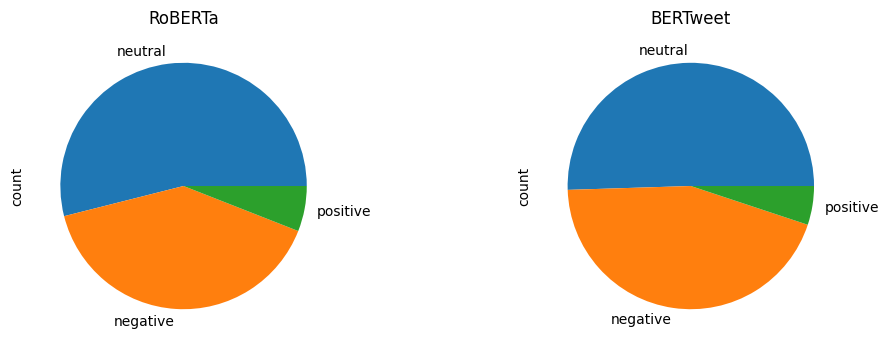

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df_merged['predicted_sentiment_roberta'].value_counts().plot(kind='pie', ax=ax[0], title='RoBERTa')
df_merged['predicted_sentiment_bertweet'].value_counts().plot(kind='pie', ax=ax[1], title='BERTweet')

In [93]:
# Krippendorff's Alpha -> measures the agreement between two models
agreement = (df_merged['predicted_sentiment_roberta'] == df_merged['predicted_sentiment_bertweet']).mean()
print(f"Models agreement percentage: {agreement:.2%}")

Models agreement percentage: 81.06%
